# ニューラルネットワークにおけるパラメータ更新部分の実装
* 2_8_two_layer_NeuralNetwork_trainee.ipynbで実装したTwoLayerNetを用いて、パラメータ更新部分を実装する。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from common.network import TwoLayerNet

## パラメータの更新

* パラメータの更新式  
  
    $\displaystyle {\bf W}_{t+1} = {\bf W}_t - \eta \frac{\partial L}{\partial {\bf W}_t}$  
      
    $\bf W$ : パラメータ(バイアスbも同様)  
    $L$ : 損失  
    $\eta$ : 学習率  

### [演習]
* 以下のパラメータを更新する部分を完成させましょう。

In [2]:
# 学習用データ(データは4つ)
##  説明変数は2次元
x = np.array([
            [1, 1],
            [1, 0],
            [0, 0],              
            [0, 1]])
##  3クラス分類問題を想定
t = np.array([
            [0, 1, 0],
            [1, 0, 0],
            [1, 0, 0],              
            [0, 1, 0]])

iters_num = 2000
lr = 0.1 #学習率

tnet = TwoLayerNet(input_size=2, hidden_size=1, output_size=3)

li_loss = []
for i in range(iters_num):
    # 勾配の計算
    grads = tnet.gradient(x, t)

    # パラメータの更新
    for key in tnet.params.keys():
        tnet.params[key] -= lr * grads[key] # パラメータの更新式
        
    # 学習経過の記録
    loss = tnet.loss(x, t)
    li_loss.append(loss)

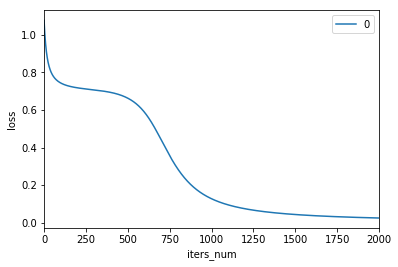

In [3]:
# lossのグラフ化
pd.DataFrame(li_loss).plot()
plt.ylabel("loss")
plt.xlabel("iters_num")
plt.show()

In [4]:
# 最終パラメータの確認
print("W1=\n", tnet.params["W1"].round(2))
print("b1=\n", tnet.params["b1"].round(2))
print("W2=\n", tnet.params["W2"].round(2))
print("b2=\n", tnet.params["b2"].round(2))

W1=
 [[-0.32]
 [ 4.94]]
b1=
 [-2.23]
W2=
 [[-3.79  5.1  -1.31]]
b2=
 [ 3.46 -0.89 -2.58]


* 最終のW1のパラメータを見ると、-0.32と4.94であるため、xの1次元目の説明変数はほとんど影響していないことがわかる